In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
plt.style.use('seaborn-ticks')
plt.rcParams.update({'font.size': 14})

$$\text{Standartization}$$

In [3]:
def standardization(X):
    S = (X - X.mean(axis=0)) / X.std(axis=0)
    return S

$$\text{Gradient of Logloss function}$$

In [4]:
def grad(y, y_pred, X):
    return (1/X.shape[0]) * (y_pred - y)@X
    

$$\text{Sigmoid function}$$

In [5]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

$$\text{Logloss}$$

In [7]:
def calc_logloss(y, p, replacement = 1e-10):
    p = np.array(p, dtype = float)
    p[p == 0] = replacement
    p[p == 1] = 1 - replacement
    err = np.mean(- y * np.log(p) - (1.0 - y) * np.log(1.0 - p))
    return err

$$\text{Logistic Regression}$$

In [8]:
def eval_LR_model(X, y, iterations, eta=1e-4, verbose = False):
    np.random.seed(42)
    w = np.random.randn(X.shape[1])
    n = X.shape[0]
    errs = []
    for i in range(iterations):
        y_pred = sigmoid(X@w)
        errs.append(calc_logloss(y, y_pred)) 
        w -= eta * grad(y, y_pred, X)
        if verbose and (i+1) % (iterations / 10) == 0:
            print(i+1, w, errs[-1])
    return w, np.array(errs)

In [9]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],  # стаж репетитора
              [500, 700, 750, 600, 1450,        # средняя стоимость занятия
               800, 1500, 2000, 450, 1000],
              [21, 25, 27, 20, 25, 18, 35, 60, 20, 30]],  # возраст репетитора
              #[1, 1, 2, 1, 2, 1, 3, 3, 1, 2]],  # квалификация репетитора
              dtype = np.float64).T 

y = np.array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1]) # поступил или нет ученик на специальность Математика
X_st = X.copy()
#стандартизация признаков
X_st[:, 1:] = standardization(X[:, 1:])


In [94]:
w, errs = eval_LR_model(X_st, y, 1000, 1e-1)

### <b> Task №1

* Заменим нулевые вероятности на значения близкие к нулю. Например на $10^{-10}$, а вероятности, близкие к единице — на $1 - 10^{-10}$.

### <b> Task №2, Hyperparameters research

In [10]:
etas = [1e-1, 1e-2, 1e-3]
iterations = [1000, 10000, 100000]
colors = ['#DC143C', '#FF1493', '#00FF00', '#00CED1']

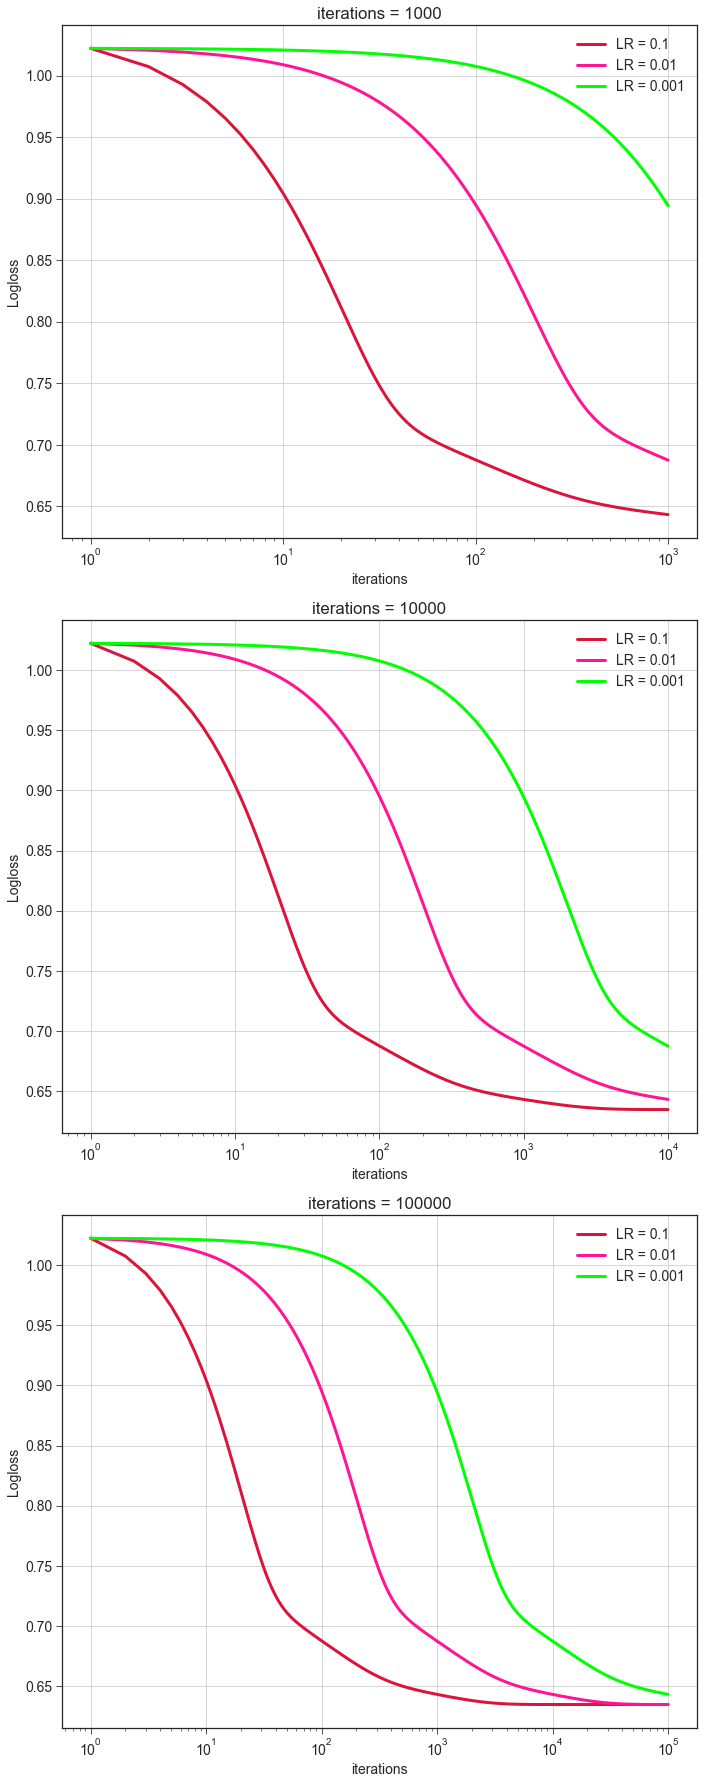

In [11]:
n, m = len(iterations), len(etas)
fig, ax = plt.subplots(n, 1,  figsize = (10, 25))
for i in range(n):
    ax[i].set_title(f'iterations = {iterations[i]}')
    ax[i].set_xlabel('iterations')
    ax[i].set_ylabel('Logloss')
    for j in range(m):
        w, errs = eval_LR_model(X_st, y, iterations[i], etas[j])
        ax[i].plot(np.arange(1, len(errs)+1), errs, color = colors[j], linewidth = 3, label = f'LR = {etas[j]}')        

    ax[i].set_xscale('log')
    ax[i].grid()
    ax[i].legend()
plt.tight_layout()        
        

In [115]:
etas = [1e-1, 1e-2, 1e-3]
iterations = 1000000
colors = ['#DC143C', '#FF1493', '#00FF00', '#00CED1']

n = len(etas)

errs_list = []
weights_list = []

for i in range(n):
    w, errs = eval_LR_model(X_st, y, iterations, etas[i])
    errs_list.append(errs)
    weights_list.append(w)
    

errs_list = np.array(errs_list)
weights_list = np.array(weights_list)

* Найдем номер итерации, с которой $\text{log-loss}$ перестает изменяться в 6-м знаке после запятой, при $LR = 0.1$

In [149]:
ks = []

k = 0
while abs(errs_list[0, k] - errs_list[0, k+1]) > 1e-6:
    k += 1
ks.append(k)
log_loss = errs_list[0, k]

* Найдем номер итерации, с которой $\text{log-loss}$ ,при других параметрах $LR$, будет отличаться от $\text{log-loss}$, полученной при $LR = 0.1$, не больше чем на $10^{-6}$

In [153]:
for i in range(1, n):
    k = 0
    while abs(errs_list[i, k] - log_loss) > 1e-6:
        k += 1
    ks.append(k)
ks = np.array(ks)

In [159]:
for i in range(1, n):
    print(fr'Понадобится {ks[i]} итераций, чтобы сойтись по log-loss при LR = {etas[i]}')

Понадобится 31997 итераций, чтобы сойтись по log-loss при LR = 0.01
Понадобится 319977 итераций, чтобы сойтись по log-loss при LR = 0.001


* Т.е. при уменьшении $LR$ на порядок, понадобится на порядок больше итераций.

### <b> Task №3

In [25]:
def calc_pred_proba(X, w):
    return sigmoid(-X@w)    

In [45]:
w, errs = eval_LR_model(X_st, y, 10000, 1e-1)
y_pred_proba = calc_pred_proba(X_st, w)

### <b> Task №4

In [40]:
def calc_pred(X, w, p):
    y_pred_proba = calc_pred_proba(X, w)
    y_pred_label = np.zeros(y_pred_proba.size, dtype = int)
    y_pred_label[y_pred_proba >= p] = 1
    return y_pred_label

In [46]:
y_pred_label = calc_pred(X_st, w, 0.5)

### <b> Task №5

In [92]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

$$\text{Confusion matrix}$$

In [75]:
def confusion_matrix(y, y_pred):    
    mask_ones = y == 1
    mask_zero = y == 0
    
    #Calculus TP
    TP = sum(y_pred[mask_ones] == 1)
    #Calculus TN
    TN = sum(y_pred[mask_zero] == 0)
    #Calculus FP
    FP = sum(y_pred[mask_zero] == 1)
    #Calculus FN
    FN = len(y) - TP - TN - FP
    
    conf_matrix = np.array([[TP, FP], [FN, TN]])
    return conf_matrix
    

$$\text{Accuracy score}$$

In [83]:
def accuracy(conf_matrix):
    n = sum(conf_matrix.ravel())
    return (conf_matrix[0, 0] + conf_matrix[1, 1])/n

$$\text{Precision score}$$

In [85]:
def precision(conf_matrix):
    return conf_matrix[0, 0]/sum(conf_matrix[0, :])

$$\text{Recall score}$$

In [86]:
def recall(conf_matrix):
    return conf_matrix[0, 0]/sum(conf_matrix[:, 0])

$$\text{F1 score}$$

In [89]:
def f1(conf_matrix):
    prec, rec = precision(conf_matrix), recall(conf_matrix)
    return 2*(prec*rec)/(prec+rec)
    

In [79]:
conf_matrix = confusion_matrix(y, y_pred_label)

In [98]:
metrics = [accuracy(conf_matrix), precision(conf_matrix), recall(conf_matrix), f1(conf_matrix)]

In [99]:
metrics_sklearn = [accuracy_score(y, y_pred_label), precision_score(y, y_pred_label), recall_score(y, y_pred_label), f1_score(y, y_pred_label)]

In [100]:
assert metrics == metrics_sklearn, 'Wrong functions'